# Longitudinal profiles

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf, erfc, gamma
import numpy as np
import pandas as pd
import uproot

In this notebook we give a look at longitudinal profiles. In the previous tutorial, we have seen how to construct the longitudinal profile. Here we are going to fit it and to study which information we can extract from the fit parameters. First of all we load our sample:

In [2]:
dirname = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v15/' #'/data_CMS/cms/bonanomi/'
fname = dirname + 'ntuple_435.root'
key='rechitntupler/hits'

In [3]:
branches = [u'rechit_chip', 'rechit_module', 'rechit_channel',
                u'rechit_energy', 'rechit_layer']

In [4]:
ttree = uproot.open(fname)[key]
df = ttree.pandas.df(branches, entrystop=5000)

In [5]:
df = df.reset_index(level=1,drop=True)
df.index.names = ['event']

<font color='green'>Create the longitudinal profile and plot it</font>. The average longitudinal shower profiles can be described by a gamma distribution, following what is known as Longo's parametrisation:

\\[
\frac{dE}{dt} = \left\langle E_0\right\rangle \frac{(\beta t)^{\alpha-1}\beta\exp(-\beta t)}{\Gamma(\alpha)}
\\]

It depends on the free parameters: $E_0$, the average shower energy, $\alpha$ and $\beta$, defining the shape of the profile. In [1](https://arxiv.org/pdf/hep-ex/0001020.pdf) you can find Grindhammer's paper on the parametrization of electromagnetic showers in calorimeters. 

<font color='green'>Implement Longo's parametrisation and fit the shower profile</font>. Check the values of the fit free parameters: do they make sense? Do you need to put some constraints on the parameters (e.g. initial guess with `p0`) to help the fit converge?

In [13]:
# def showerShape(t, alpha, beta, E):
#     '''Gamma distribution to fit longitudial shower shapes in particles calorimeters.
#     See equation 2 in https://arxiv.org/pdf/hep-ex/0001020v1.pdf
#     '''
#     return E * ((beta * t) ** (alpha - 1) * beta * np.exp(-beta * t)) / gamma(alpha)

In [14]:
# hits = df.groupby(['event', 'rechit_layer']).rechit_energy.sum()

In [15]:
# avg_prf = hits.groupby('rechit_layer').mean()

/usr/local/bin/start_ipykernel.py:5: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/usr/local/bin/start_ipykernel.py:5: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Longitudinal profile')

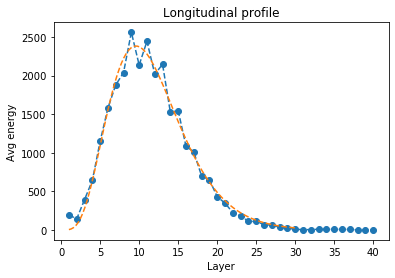

In [32]:
# plt.plot(avg_prf, 'o--')
# popt, pcov = curve_fit(showerShape, np.arange(1,29,1), avg_prf[:28])
# plt.plot(np.linspace(1,30,100), showerShape(np.linspace(1,30,100), *popt),'--')
# plt.xlabel('Layer')
# plt.ylabel('Avg energy')
# plt.title('Longitudinal profile')

# Exercises

In the `dirname` folder you can find the files for all the other beam energies. For each dataset:
 * Open the file as a pandas `df`;
 * Create the average longitudinal profiles and fit them with the shower shape parametrization you have implemented above;
 * Plot the `<E_0>` values from the fit vs the true beam energy. Do you get a linear relation? Which is the conversion factor from the MIP energy scale to the GeV one?